# Calibration between Binaural Microphones

In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from pathfinder import Pathfinder

relative_paths = [['..', '..', '..', '..', '..', '..', '資料科學', 'Allen Downey', 'Think DSP', 'code'],
                  ['..', '..', '..', '..', 'AutoEq'],
                  ['..', 'codes']]

Pathfinder.append_relative_paths(relative_paths)

from drc.sound import Sound
from drc.measurements.frequency.responses import FrequencyResponse
from drc.measurements.frequency.calibrations import Calibrator

# Devices indexing

In [3]:
# from pprint import pprint

# pprint(Sound.scan_devices(0))

# Microphones

## [E.A.R.S.](https://www.minidsp.com/products/acoustic-measurement/ears-headphone-jig)

In [4]:
from drc.measurements.frequency.calibrations.miniDSP import EAR, EARS
 
fn_calibrations = {'left' : 'L_RAW_8603591.txt',
                   'right': 'R_RAW_8603591.txt'}
ears = EARS()
ears.load(fn_calibrations)

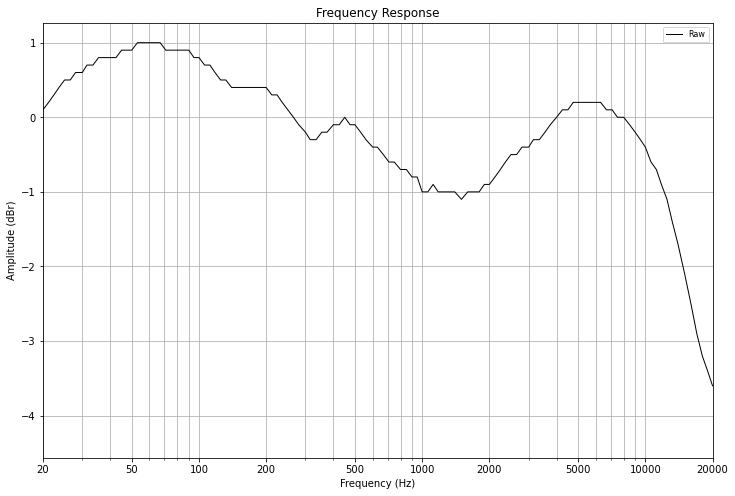

In [5]:
ears.ears['left'].frequency_response.plot();

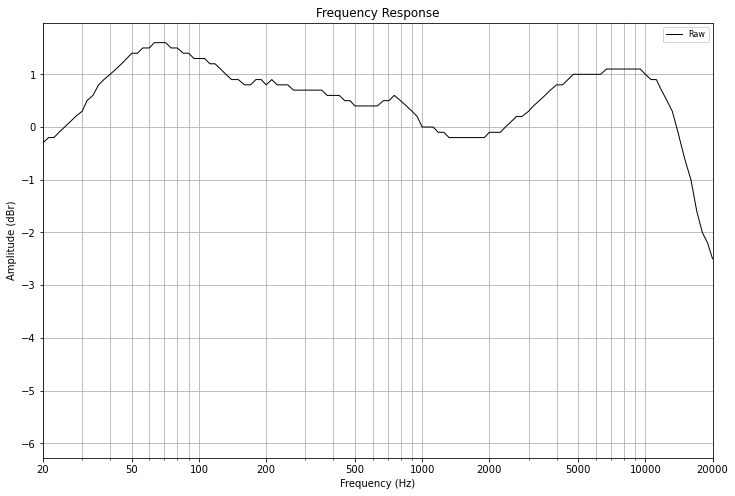

In [6]:
ears.ears['right'].frequency_response.plot();

In [7]:
def probe(channel_name, n_samplings = 20):  
    mic = ears.ears[channel_name]    
    return mic.get_frequency_response(input_device_idx = 1, n_samplings = n_samplings)

def probe_channel(channel_name, plot = True):          
    fr, _ = probe(channel_name)        
    fr.name = channel_name
    
    if plot:
        fr.plot_graph(raw_plot_kwargs= {'color': 'green', 'alpha': 0.5},
                      smoothed_plot_kwargs= {'color': 'red', 'alpha': 0.5})
    return fr

# Get frequency responses from binaural microphones

### Use left microphone to measure left channel of headphones.

In [8]:
fr_left = probe_channel('left', plot = False)

C:\Softwares\Python\lib\site-packages\numpy\fft\_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)


### Turn headphones around, use righ microphone to measure left channel of headphones.

In [10]:
fr_right = probe_channel('right', plot = False)

C:\Softwares\Python\lib\site-packages\numpy\fft\_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)


In [11]:
if fr_right.raw.mean() < fr_left.raw.mean():
    weaker_side = 'right'
    WEAKER_SIDE = 'R'
    frs = (fr_right, fr_left)
else:
    weaker_side = 'left' 
    WEAKER_SIDE = 'L'
    frs = (fr_left, fr_right)
    
weaker_side

'right'

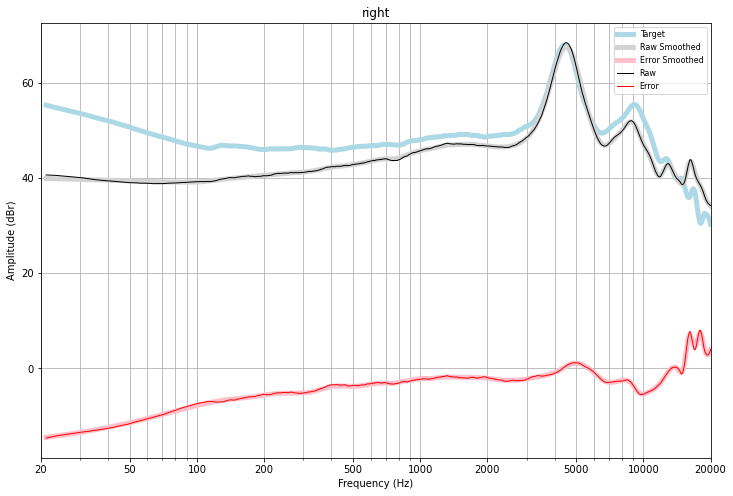

In [12]:
fr_measurement, fr_calibration_diff = Calibrator.calibrate(*frs, centered = False)  # must centered = False
fr_measurement.plot_graph();

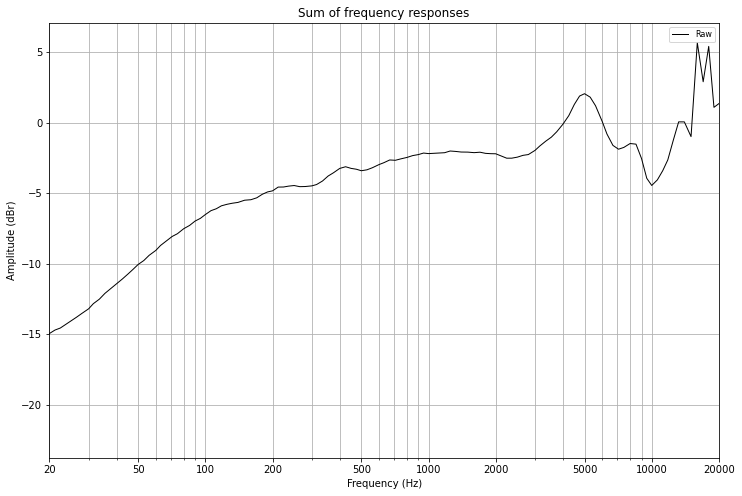

In [13]:
fr_calibration_new = ears.ears[weaker_side].frequency_response + fr_calibration_diff
fr_calibration_new.plot();

# Dump calibration file

In [14]:
fn_calibration_new = f'{WEAKER_SIDE}_RAW_8603591_add_diff_to_left.txt'

mic = ears.ears[weaker_side].copy()
mic.responses = fr_calibration_new.responses
mic.dump(fn_calibration_new)
fn_calibration_new

'R_RAW_8603591_add_diff_to_left.txt'

# Apply and validate new calibration file

In [15]:
ears.ears[weaker_side].load(fn_calibration_new);

### Use left microphone to measure left channel of headphones.

In [18]:
fr_left = probe_channel('left', plot = False)

C:\Softwares\Python\lib\site-packages\numpy\fft\_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)


### Turn headphones around, use righ microphone to measure left channel of headphones.

In [16]:
fr_right = probe_channel('right', plot = False)

C:\Softwares\Python\lib\site-packages\numpy\fft\_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)


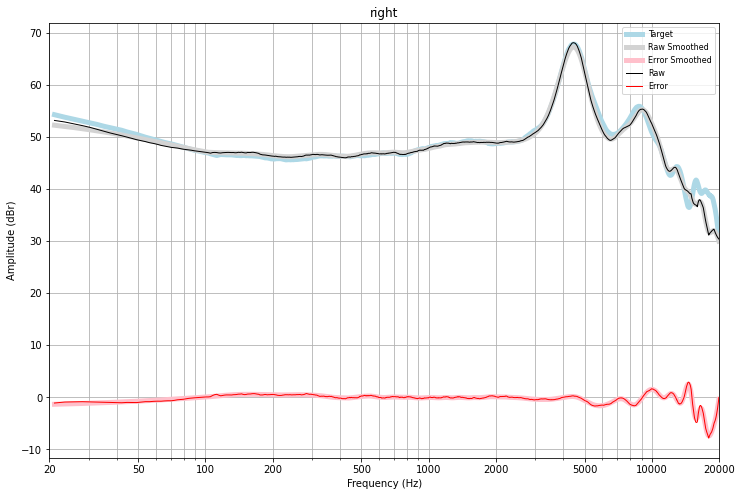

In [19]:
fr_measurement, fr_calibration_diff = Calibrator.calibrate(fr_right, fr_left, centered = False)  # must centered = False
fr_measurement.plot_graph();

# Load calibration file and convert into FrequencyResponse

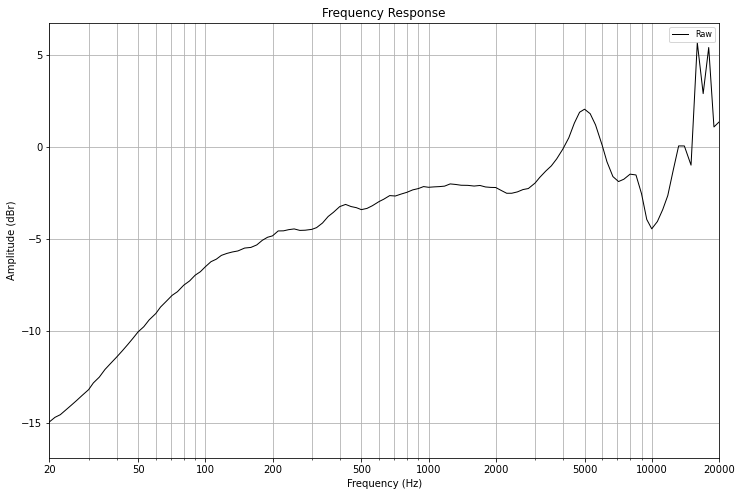

In [20]:
mic.load(fn_calibration_new)
mic.frequency_response.plot();

# Read calibraton.csv into FrequencyResponse

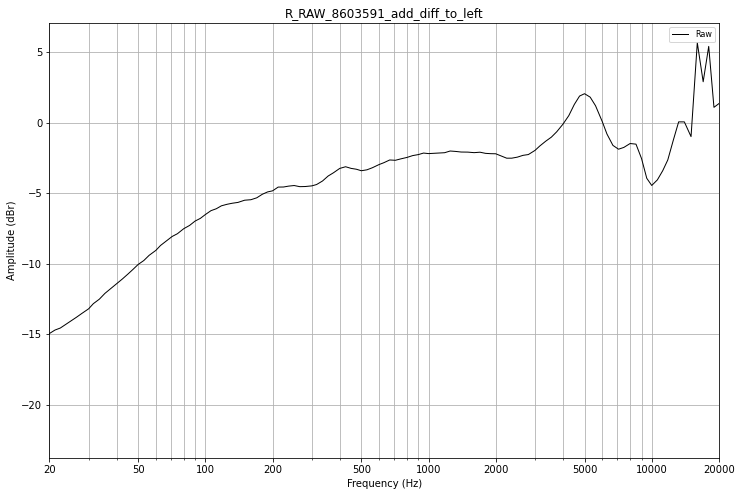

In [21]:
FrequencyResponse.read_from_csv(fn_calibration_new).plot();